In [1]:
import pandas as pd
import os
import seaborn as sns

In [2]:
data_dir = out_dir = "/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/reconstruction"

In [3]:
df_50 = pd.read_csv(os.path.join(data_dir, "negativity_pca_50.csv")).T
df_100 = pd.read_csv(os.path.join(data_dir, "negativity_pca_100.csv")).T
df_300 = pd.read_csv(os.path.join(data_dir, "negativity_pca_300.csv")).T
df_vae = pd.read_csv(os.path.join(data_dir, "negativity_vae.csv")).T

In [4]:
df_50.columns=df_50.iloc[0,:]
df_50 = df_50.iloc[1:, :]
df_100.columns=df_100.iloc[0,:]
df_100 = df_100.iloc[1:, :]
df_300.columns=df_300.iloc[0,:]
df_300 = df_300.iloc[1:, :]
df_vae.columns=df_vae.iloc[0,:]
df_vae = df_vae.iloc[1:, :]

In [5]:
df_50["dose"] = df_50.apply(lambda x: x.name.split("_")[-1], axis=1)
df_100["dose"] = df_100.apply(lambda x: x.name.split("_")[-1], axis=1)
df_300["dose"] = df_300.apply(lambda x: x.name.split("_")[-1], axis=1)
df_vae["dose"] = df_vae.apply(lambda x: x.name.split("_")[-1], axis=1)

In [6]:
df_50["embedding"] = "PC_50"
df_100["embedding"] = "PC_100"
df_300["embedding"] = "PC_300"
df_vae["embedding"] = "VAE"

In [7]:
df = pd.concat((df_50, df_100, df_300, df_vae))

In [8]:
df

Unnamed: 0,0.0,dose,embedding
A549_Quisinostat_(JNJ-26481585)_2HCl_10.0,0.261591,10.0,PC_50
A549_Alvespimycin_(17-DMAG)_HCl_10.0,0.361498,10.0,PC_50
A549_Flavopiridol_HCl_10000.0,0.356601,10000.0,PC_50
A549_Belinostat_(PXD101)_1000.0,0.339906,1000.0,PC_50
A549_Hesperadin_1000.0,0.335246,1000.0,PC_50
...,...,...,...
K562_Hesperadin_1000.0,0.332969,1000.0,VAE
K562_Belinostat_(PXD101)_100.0,0.333410,100.0,VAE
A549_Vehicle_0.0,0.408293,0.0,VAE
MCF7_Vehicle_0.0,0.416321,0.0,VAE


<Axes: xlabel='dose', ylabel='0.0'>

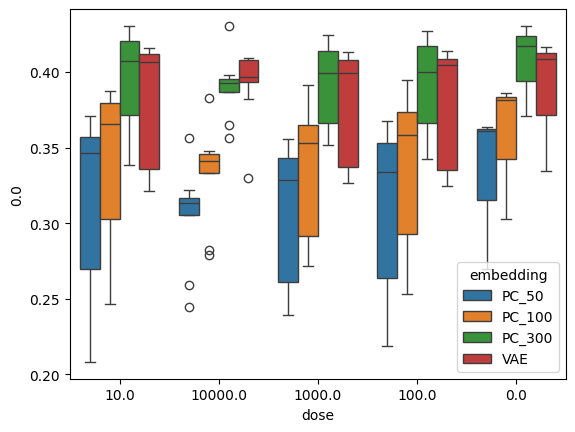

In [9]:
sns.boxplot(df, x="dose", y=0.0, hue="embedding")

In [10]:
df["fraction_negative"] = df[0.0]

In [11]:
df.to_csv(os.path.join(data_dir, "negativity_allocated.csv"))